# DLVC 2017
# 2nd July 2017, Tutorial 2
# MNIST Digits Classification (Classical Approach)

### MNIST database (http://yann.lecun.com/exdb/mnist/)

Consists of four files: <br>
* train-images-idx3-ubyte.gz:  training set images (9912422 bytes) <br>
* train-labels-idx1-ubyte.gz:  training set labels (28881 bytes) <br>
* t10k-images-idx3-ubyte.gz:   test set images (1648877 bytes) <br>
* t10k-labels-idx1-ubyte.gz:   test set labels (4542 bytes)  <br>


In [2]:
%matplotlib inline
from pylab import *
import pickle
from skimage import feature
import struct
from sklearn import preprocessing
import os

if not os.path.exists('tut02-results'):
    os.makedirs('tut02-results')

Train data size: (60000, 28, 28)
Train label size: (60000,)
Test data size: (10000, 28, 28)
Train label size: (10000,)
Label: 5


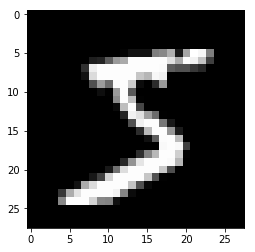

In [3]:
# Loading dataset
# Training data
with open('data/tut02/mnist/train-labels.idx1-ubyte', 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        train_label = np.fromfile(flbl, dtype=np.int8)

with open('data/tut02/mnist/train-images.idx3-ubyte', 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        train_data = np.fromfile(fimg, dtype=np.uint8).reshape(len(train_label), rows, cols)
        
# Testing data
with open('data/tut02/mnist/t10k-labels.idx1-ubyte', 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        test_label = np.fromfile(flbl, dtype=np.int8)

with open('data/tut02/mnist/t10k-images.idx3-ubyte', 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        test_data = np.fromfile(fimg, dtype=np.uint8).reshape(len(test_label), rows, cols)
        
print('Train data size: '+str(train_data.shape))
print('Train label size: '+str(train_label.shape))
print('Test data size: '+str(test_data.shape))
print('Train label size: '+str(test_label.shape))

# Sample data
imshow(train_data[0],'gray')
print('Label: '+str(train_label[0]))

In [4]:
# Feature extraction and data preparation
# Training features
train_greycoHomFeat = [feature.greycoprops(feature.greycomatrix(x, [1], [np.pi/4],normed=True),prop='homogeneity') for x in list(train_data)]
train_greycoConFeat = [feature.greycoprops(feature.greycomatrix(x, [1], [np.pi/4],normed=True),prop='contrast') for x in list(train_data)]
train_greycoEnFeat = [feature.greycoprops(feature.greycomatrix(x, [1], [np.pi/4],normed=True),prop='energy') for x in list(train_data)]
train_greycoCorrFeat = [feature.greycoprops(feature.greycomatrix(x, [1], [np.pi/4],normed=True),prop='correlation') for x in list(train_data)]
train_hogFeat = [feature.hog(x, orientations=4, pixels_per_cell=(5,5)) for x in list(train_data)]
train_lbpFeat = [feature.local_binary_pattern(x, 5, 3) for x in list(train_data)]

# Testing features
test_greycoHomFeat = [feature.greycoprops(feature.greycomatrix(x, [1], [np.pi/4],normed=True),prop='homogeneity') for x in list(test_data)]
test_greycoConFeat = [feature.greycoprops(feature.greycomatrix(x, [1], [np.pi/4],normed=True),prop='contrast') for x in list(test_data)]
test_greycoEnFeat = [feature.greycoprops(feature.greycomatrix(x, [1], [np.pi/4],normed=True),prop='energy') for x in list(test_data)]
test_greycoCorrFeat = [feature.greycoprops(feature.greycomatrix(x, [1], [np.pi/4],normed=True),prop='correlation') for x in list(test_data)]
test_hogFeat = [feature.hog(x, orientations=4, pixels_per_cell=(5,5)) for x in list(test_data)]
test_lbpFeat = [feature.local_binary_pattern(x, 5, 3) for x in list(test_data)]



In [6]:
# Data
trainFeat = np.zeros((60000,1896))
for num in range(60000):    
    trainFeat[num][:] = np.concatenate((train_greycoHomFeat[num].reshape(1,),train_greycoConFeat[num].reshape(1,),
                            train_greycoEnFeat[num].reshape(1,),train_greycoCorrFeat[num].reshape(1,),
                                        train_hogFeat[num],train_lbpFeat[num].reshape(28*28),train_data[num].reshape(28*28)),axis=0)

testFeat = np.zeros((10000,1896))
for num in range(10000):    
    trainFeat[num][:] = np.concatenate((test_greycoHomFeat[num].reshape(1,),test_greycoConFeat[num].reshape(1,),
                            test_greycoEnFeat[num].reshape(1,),test_greycoCorrFeat[num].reshape(1,),
                                        test_hogFeat[num],test_lbpFeat[num].reshape(28*28),test_data[num].reshape(28*28)),axis=0)
trainFeat_scaled = preprocessing.scale(trainFeat)
testFeat_scaled = preprocessing.scale(testFeat)

with open('tut02-results/trainFeat_scaled.pkl','wb') as f:
    pickle.dump(trainFeat_scaled,f)
with open('tut02-results/testFeat_scaled.pkl','wb') as f:
    pickle.dump(testFeat_scaled,f)

In [5]:
from sklearn.neural_network import MLPClassifier
#scikitlearn documentation for MLP classifier: goo.gl/F1Q1Fa

nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=True, tol=1e-4, random_state=1,
                    learning_rate_init=1e-2)
nn.fit(trainFeat_scaled, train_label)       
prediction = nn.predict(testFeat_scaled)

Iteration 1, loss = 1.00709560
Iteration 2, loss = 0.84991739
Iteration 3, loss = 0.80926330
Iteration 4, loss = 0.78343154
Iteration 5, loss = 0.76217766
Iteration 6, loss = 0.74173220
Iteration 7, loss = 0.72489728
Iteration 8, loss = 0.70789063
Iteration 9, loss = 0.69063643
Iteration 10, loss = 0.67517406
Iteration 11, loss = 0.65909001
Iteration 12, loss = 0.64398507
Iteration 13, loss = 0.62917175
Iteration 14, loss = 0.61459773
Iteration 15, loss = 0.60063437
Iteration 16, loss = 0.58721732
Iteration 17, loss = 0.57405328
Iteration 18, loss = 0.55917347
Iteration 19, loss = 0.54686804
Iteration 20, loss = 0.53739046
Iteration 21, loss = 0.52346930
Iteration 22, loss = 0.51008790
Iteration 23, loss = 0.49758825
Iteration 24, loss = 0.48684645
Iteration 25, loss = 0.47715227
Iteration 26, loss = 0.46384892
Iteration 27, loss = 0.45277977
Iteration 28, loss = 0.44099510
Iteration 29, loss = 0.42916387
Iteration 30, loss = 0.41766372
Iteration 31, loss = 0.41086157
Iteration 32, los

In [6]:
print("Training set score: %f" % nn.score(trainFeat_scaled, train_label)) # mean accuracy
print("Test set score: %f" % nn.score(testFeat_scaled, test_label))

Training set score: 0.961583
Test set score: 0.097400
